<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/Influential-Observations/blob/main/JOHAN_SANTANA_GALVAN_Observaciones_influyentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo 2_4:** Determinación de observaciones influyentes: método de jackknife

---



**PROBLEMA**: Queremos averiguar si existe algún dato  influyente para los procedimientos estadísticos de calcular la **media** y la **mediana**.
> Vamos a generar una muestra simulando los ingresos de un vecindario. Supongamos que hay un vecino con unos ingresos signficativamente altos.



In [12]:
# JOHAN SANTANA GALVÁN
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import scipy.stats as st
# Generación de datos
# ==============================================================================
# Generamos (100 elementos) ingresos uniformemente distribuidos en [15000,25000]
datos = 15000+np.random.rand(100)*10000
datos_ord = datos
datos_ord.sort()
datos

array([15028.20934406, 15030.79424239, 15284.63972613, 15335.81390913,
       15385.64914089, 15419.13501666, 15429.07971774, 15610.33810489,
       15770.11164411, 15831.43568116, 15908.1447283 , 15954.91406938,
       15992.26595145, 16157.83101441, 16204.98835404, 16260.6831195 ,
       16284.55423451, 16596.22515586, 16599.21111151, 16616.04251289,
       16645.39822368, 16648.74983606, 16674.2804753 , 16939.45816167,
       16998.72217435, 17075.76981164, 17078.36450673, 17196.70729454,
       17630.08115029, 17679.77135831, 17950.0693234 , 18088.40116768,
       18114.36083119, 18128.79464335, 18217.1830311 , 18617.89740142,
       18768.15255494, 18906.86224477, 18909.32358443, 18914.88511689,
       19029.92485327, 19135.08337696, 19151.37323566, 19172.52827543,
       19372.88178899, 19395.85169198, 19460.8982244 , 19471.95061386,
       19508.12084883, 19682.43738936, 19846.41170957, 19851.58559928,
       19861.51943925, 20049.85612122, 20299.83051454, 20343.32740086,
      

**Ejercicio**: Calcular la media y la mediana antes de realizar la modificación de incluir unos ingresos de 500.000€

In [13]:
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 19872.0971389269 y Mediana=19764.42454946554


In [14]:
# El vecino 50 tiene unos ingresos significativamente mayores que el resto
datos[50]=500000
datos

array([ 15028.20934406,  15030.79424239,  15284.63972613,  15335.81390913,
        15385.64914089,  15419.13501666,  15429.07971774,  15610.33810489,
        15770.11164411,  15831.43568116,  15908.1447283 ,  15954.91406938,
        15992.26595145,  16157.83101441,  16204.98835404,  16260.6831195 ,
        16284.55423451,  16596.22515586,  16599.21111151,  16616.04251289,
        16645.39822368,  16648.74983606,  16674.2804753 ,  16939.45816167,
        16998.72217435,  17075.76981164,  17078.36450673,  17196.70729454,
        17630.08115029,  17679.77135831,  17950.0693234 ,  18088.40116768,
        18114.36083119,  18128.79464335,  18217.1830311 ,  18617.89740142,
        18768.15255494,  18906.86224477,  18909.32358443,  18914.88511689,
        19029.92485327,  19135.08337696,  19151.37323566,  19172.52827543,
        19372.88178899,  19395.85169198,  19460.8982244 ,  19471.95061386,
        19508.12084883,  19682.43738936, 500000.        ,  19851.58559928,
        19861.51943925,  

Cálculo de media y mediana en toda la muestra

In [15]:
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 24673.633021831207 y Mediana=19767.01149432103


Notar que los ingresos del barrio son aprox. 20000 euros. El hecho que se haya trasladado un vecino rico ha incrementando aprox. en 5000 euros la media. La mediana es insensible a este hecho. Se trata de identificar que datos son influyentess para los dos procedimientos estadísticos

Ejercicio: Aplicar el método de describe para ver un resumen estadístico de los datos.

In [ ]:
# Insertar el código aquí

**Ejercicio**: Aplicar el método de Probabilidad global, para detectar los outliers utilizado en el ejemplo 2_3_Outliers

In [16]:
# Insertar el código aquí
p_g=0.95
# probabilidad global
alfa_g=(1-p_g)/2
# probabilidad  para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos)) # Se realiza este ajuste para ser más precisos.
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)
print(f" Alfa ={alfa}")
print(f" Z_alfa ={Z_alfa}")

 Alfa =0.00025
 Z_alfa =3.65906


In [17]:
# Utilizaremos el Criterio 1 ó el Criuterio 2 para calcular alfa y Z-alfa en función de la naturaleza de los datos que estamos procesando.
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ -150465.2423,199812.5084]


In [18]:
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

 El dato[50]=500000.0 es un outlier


Otra forma de detactar los outliers

**Método :**  Detectemos los outlier de phi medinate el método Jackknife y a continuación aplicamos el método de la distancia entre Quartiles

In [19]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.mean(datos_sin_i)
phi

array([24771.06154383, 24771.03543374, 24768.47133795, 24767.95442701,
       24767.45104083, 24767.11279966, 24767.01234814, 24765.18145534,
       24763.5675812 , 24762.94814648, 24762.17330762, 24761.70089004,
       24761.3235983 , 24759.65122393, 24759.17488716, 24758.61231377,
       24758.3711914 , 24755.22300028, 24755.19283911, 24755.02282495,
       24754.72630262, 24754.69244795, 24754.43456271, 24751.75600022,
       24751.15737383, 24750.37911486, 24750.35290582, 24749.15752413,
       24744.78001043, 24744.27808914, 24741.54780666, 24740.15051531,
       24739.88829648, 24739.7425004 , 24738.8496884 , 24734.8020685 ,
       24733.28433968, 24731.8832317 , 24731.85836968, 24731.80219259,
       24730.64017505, 24729.57796774, 24729.41342371, 24729.19973644,
       24727.17596358, 24726.94394435, 24726.28690867, 24726.17526838,
       24725.80991247, 24724.04913933, 19872.35658771, 24722.34057155,
       24722.24022974, 24720.33783901, 24717.81284514, 24717.37348265,
      

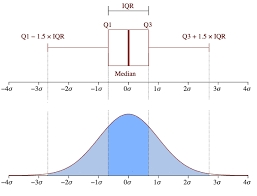

In [20]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

 El dato 50 es una observación influyente para la media


In [ ]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,24300.097979
std,486.155764
min,19495.048464
25%,24326.231562
50%,24348.685651
75%,24373.526227
max,24390.795053


**Ejercicio**: Repetir el mismo procedimiento (método Jackenife) de detectar los outliers pero con la mediana en lugar de con la media: ¿Qué ocurre? ¿observas variaciones?

In [24]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.median(datos_sin_i)
phi

array([19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19851.58559928, 19851.58559928,
       19851.58559928, 19851.58559928, 19682.43738936, 19682.43738936,
       19682.43738936, 19682.43738936, 19682.43738936, 19682.43738936,
      

In [26]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la mediana")

In [27]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,19767.011494
std,85.000174
min,19682.437389
25%,19682.437389
50%,19767.011494
75%,19851.585599
max,19851.585599
